In [ ]:
import cv2 as cv
import numpy as np
import os

def filtrar_huellas(imagen):
    imagen_gris = cv.cvtColor(imagen, cv.COLOR_BGR2GRAY)
    
    imagen_filtrada = cv.medianBlur(imagen_gris, 5)
    
    imagen_clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8)).apply(imagen_filtrada)

    imagen_binaria = cv.adaptiveThreshold(
        imagen_clahe,
        255,
        cv.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv.THRESH_BINARY,
        11,
        10
    )

    imagen_binaria = cv.medianBlur(imagen_binaria, 3)
    
    return imagen_binaria

sample_path = "imagenes_huellas"
files = os.listdir(sample_path)

for file in files:
    dir = os.path.join(sample_path, file)
    file2 = os.listdir(dir)
    ruta = os.path.join(dir, file2[0])
    sample = cv.imread(ruta)  
    sample = filtrar_huellas(sample)

cv.imshow('Huellas', sample)
cv.waitKey(0)
cv.destroyAllWindows()


Imagen cargada correctamente.


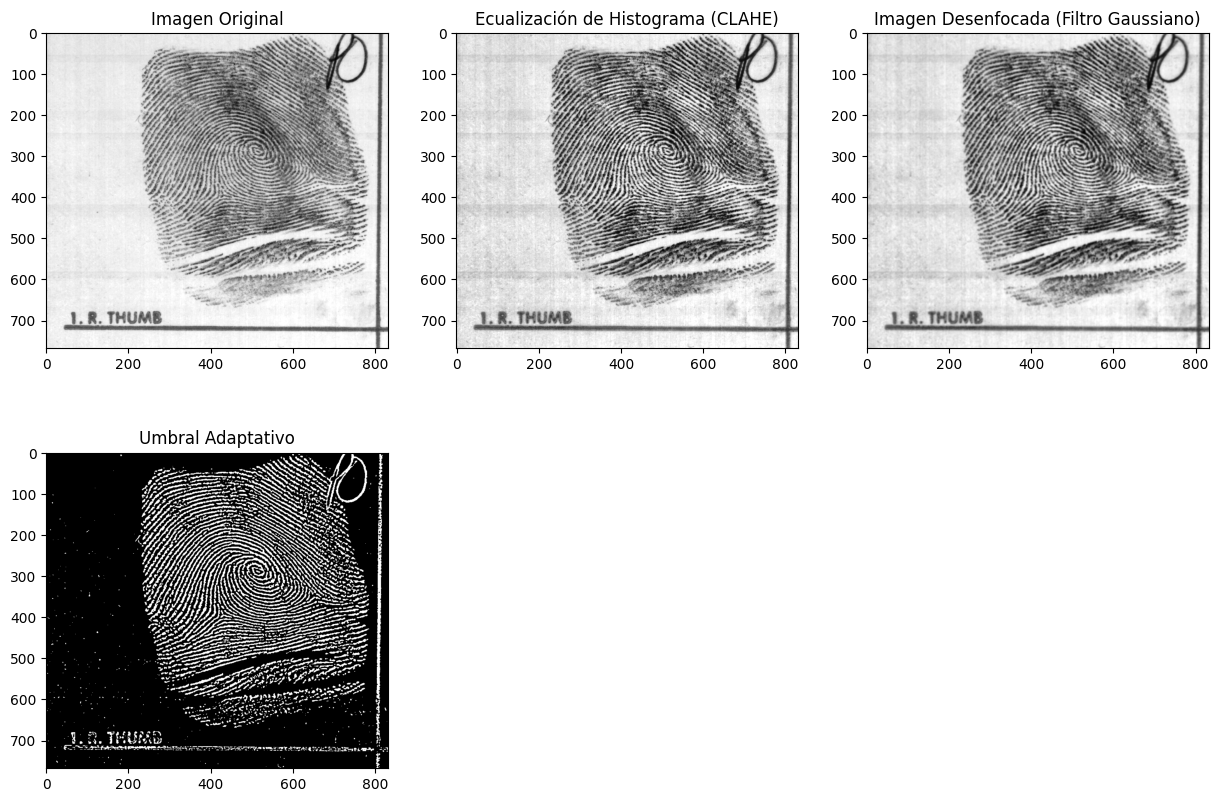

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = 'imagenes_huellas/crd_0820f/crd_0820s_01.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: No se pudo cargar la imagen.")
else:
    print("Imagen cargada correctamente.")
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    equalized_image = clahe.apply(image)
    
    blurred_image = cv2.GaussianBlur(equalized_image, (5, 5), 0)
    
    thresh_image = cv2.adaptiveThreshold(
        blurred_image,
        255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY,
        11,
        10
    )
    
    inverted_image = cv2.bitwise_not(thresh_image)

    cv2.imshow('Imagen', inverted_image)

    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 3, 1)
    plt.title('Imagen Original')
    plt.imshow(image, cmap='gray')
    plt.subplot(2, 3, 2)
    plt.title('Ecualización de Histograma (CLAHE)')
    plt.imshow(equalized_image, cmap='gray')
    plt.subplot(2, 3, 3)
    plt.title('Imagen Desenfocada (Filtro Gaussiano)')
    plt.imshow(blurred_image, cmap='gray')
    plt.subplot(2, 3, 4)
    plt.title('Umbral Adaptativo')
    plt.imshow(inverted_image, cmap='gray')
    plt.show()


In [48]:
import cv2
import numpy as np
import os

input_dir = 'imagenes_recortadas'
output_dir = 'imagenes_filtradas'

os.makedirs(output_dir, exist_ok=True)

def procesar_imagen(image_path, output_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        print(f"Error: No se pudo cargar la imagen {image_path}.")
        return
    
    clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8, 8))
    equalized_image = clahe.apply(image)
    
    bilateral_filtered = cv2.bilateralFilter(equalized_image, d=9, sigmaColor=75, sigmaSpace=75)
    
    median_filtered = cv2.medianBlur(bilateral_filtered, 3)
    
    thresh_image = cv2.adaptiveThreshold(
        median_filtered,
        255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY,
        19,
        3
    )
    
    inverted_image = cv2.bitwise_not(thresh_image)
    
    kernel = np.ones((3, 3), np.uint8)
    cleaned_image = cv2.morphologyEx(inverted_image, cv2.MORPH_OPEN, kernel)
    
    skeleton = np.zeros(cleaned_image.shape, np.uint8)
    img = cleaned_image.copy()
    while True:
        eroded = cv2.erode(img, None)
        temp = cv2.dilate(eroded, None)
        temp = cv2.subtract(img, temp)
        skeleton = cv2.bitwise_or(skeleton, temp)
        img = eroded.copy()
        if cv2.countNonZero(img) == 0:
            break

    cv2.imwrite(output_path, skeleton)
    print(f"Imagen procesada y guardada en {output_path}")

for root, dirs, files in os.walk(input_dir):
    for file in files:
        if file.endswith('.png'):
            image_path = os.path.join(root, file)
            output_path = os.path.join(output_dir, file)

            procesar_imagen(image_path, output_path)


Imagen procesada y guardada en imagenes_filtradas\crd_0811f_01.png
Imagen procesada y guardada en imagenes_filtradas\crd_0811s_01.png
Imagen procesada y guardada en imagenes_filtradas\crd_0812f_01.png
Imagen procesada y guardada en imagenes_filtradas\crd_0812s_01.png
Imagen procesada y guardada en imagenes_filtradas\crd_0813f_01.png
Imagen procesada y guardada en imagenes_filtradas\crd_0813s_01.png
Imagen procesada y guardada en imagenes_filtradas\crd_0814f_01.png
Imagen procesada y guardada en imagenes_filtradas\crd_0814s_01.png
Imagen procesada y guardada en imagenes_filtradas\crd_0815f_01.png
Imagen procesada y guardada en imagenes_filtradas\crd_0815s_01.png
Imagen procesada y guardada en imagenes_filtradas\crd_0816f_01.png
Imagen procesada y guardada en imagenes_filtradas\crd_0816s_01.png
Imagen procesada y guardada en imagenes_filtradas\crd_0817f_01.png
Imagen procesada y guardada en imagenes_filtradas\crd_0817s_01.png
Imagen procesada y guardada en imagenes_filtradas\crd_0818f_01

In [ ]:
import cv2
import os

input_folder = 'imagenes_huellas'
output_folder = 'imagenes_recortadas'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

crop_width, crop_height = 550, 550  # Ajusta el tamaño del recorte deseado

for root, dirs, files in os.walk(input_folder):
    for file in files:
        img_path = os.path.join(root, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is None:
            print(f"Error al leer la imagen {img_path}")
            continue

        _, thresh = cv2.threshold(img, 225, 255, cv2.THRESH_BINARY_INV)

        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        if contours:
            largest_contour = max(contours, key=cv2.contourArea)

            x, y, w, h = cv2.boundingRect(largest_contour)

            center_x, center_y = x + w // 2, y + h // 2

            x_start = max(center_x - crop_width // 2, 0)
            y_start = max(center_y - crop_height // 2, 0)
            x_end = min(center_x + crop_width // 2, img.shape[1])
            y_end = min(center_y + crop_height // 2, img.shape[0])

            if (x_end - x_start) != crop_width:
                x_start = max(0, x_end - crop_width)
            if (y_end - y_start) != crop_height:
                y_start = max(0, y_end - crop_height)

            cropped_img = img[y_start:y_end, x_start:x_end]

            output_path = os.path.join(output_folder, file)
            cv2.imwrite(output_path, cropped_img)
            print(f"Imagen recortada guardada en {output_path}")


Imagen recortada guardada en imagenes_recortadas\crd_0811f_01.png
Imagen recortada guardada en imagenes_recortadas\crd_0811s_01.png
Imagen recortada guardada en imagenes_recortadas\crd_0812f_01.png
Imagen recortada guardada en imagenes_recortadas\crd_0812s_01.png
Imagen recortada guardada en imagenes_recortadas\crd_0813f_01.png
Imagen recortada guardada en imagenes_recortadas\crd_0813s_01.png
Imagen recortada guardada en imagenes_recortadas\crd_0814f_01.png
Imagen recortada guardada en imagenes_recortadas\crd_0814s_01.png
Imagen recortada guardada en imagenes_recortadas\crd_0815f_01.png
Imagen recortada guardada en imagenes_recortadas\crd_0815s_01.png
Imagen recortada guardada en imagenes_recortadas\crd_0816f_01.png
Imagen recortada guardada en imagenes_recortadas\crd_0816s_01.png
Imagen recortada guardada en imagenes_recortadas\crd_0817f_01.png
Imagen recortada guardada en imagenes_recortadas\crd_0817s_01.png
Imagen recortada guardada en imagenes_recortadas\crd_0818f_01.png
Imagen rec

In [ ]:
#Red neuronal convolucional

import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torchvision.models import resnet18
from tqdm import tqdm

class HuellasDataset(Dataset):

    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.images = []
        self.labels = []

        for root, dirs, files in os.walk(data_dir):
            for file in files:
                if file.endswith('.png'):
                    img_path = os.path.join(root, file)
                    label = os.path.basename(root)
                    self.images.append(img_path)
                    self.labels.append(label)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        label = self.labels[idx]

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if self.transform:
            img = self.transform(img)

        return img, label
    
